In [97]:
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
import torch.nn.functional as F
import numpy as np
import pandas as pd
import math as math
import matplotlib.pyplot as plt

In [98]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [99]:
BATCH_SIZE = 100
NUM_EPOCHS = 2
DATA_PATH = "data/"
TRAIN_PATH = DATA_PATH + "train.csv"
TEST_PATH = DATA_PATH + "test.csv"
INPUT_SIZE = 28*28
HIDDEN_SIZE = 500
NUM_CLASSES = 10

In [100]:
class DigitsDataset(Dataset):
    
    def __init__(self, csv_path):
        self.raw_csv = pd.read_csv(csv_path)
    
    def __getitem__(self, index):
        image = torch.tensor(self.raw_csv.iloc[index, 1:]).view(28,28).to(torch.float32)
        label = F.one_hot(torch.tensor(self.raw_csv.iloc[index, 0]), num_classes=NUM_CLASSES).to(torch.float32)
        return (image, label)
    
    def __len__(self):
        return len(self.raw_csv)
    
    
    

In [101]:
class NeuralNet(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(NeuralNet, self).__init__()
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.num_classes = num_classes
        self.l1 = nn.Linear(self.input_size, self.hidden_size)
        self.relu = nn.ReLU()
        self.l2 = nn.Linear(self.hidden_size, self.num_classes)
    
    def forward(self, x):
        out  = x.view(-1, self.input_size)
        out = self.l1(out)
        out = self.relu(out)
        out = self.l2(out)
        return out

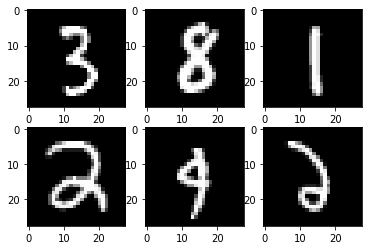

In [102]:
train_set = DigitsDataset(TRAIN_PATH)
train_loader = DataLoader(dataset=train_set, batch_size=BATCH_SIZE, shuffle=True)

train_iter = iter(train_loader)
samples, labels = next(train_iter)

for i in range(6):
    plt.subplot(2,3, i+1)
    plt.imshow(samples[i], cmap="gray")
plt.show()


In [104]:
model = NeuralNet(INPUT_SIZE, HIDDEN_SIZE, NUM_CLASSES)

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

n_total_steps = len(train_loader)
model.train()
for epoch in range(NUM_EPOCHS):
    for i, (samples, labels) in enumerate(train_loader):
        samples = samples.to(device)
        outputs = model(samples)
        loss = criterion(outputs, labels)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        print (f'Epoch [{epoch+1}/{NUM_EPOCHS}], Step [{i+1}/{n_total_steps}], Loss: {loss.item():.4f}')



Epoch [1/2], Step [1/420], Loss: 32.7742
Epoch [1/2], Step [2/420], Loss: 28.4776
Epoch [1/2], Step [3/420], Loss: 28.9416
Epoch [1/2], Step [4/420], Loss: 33.4897
Epoch [1/2], Step [5/420], Loss: 23.9124
Epoch [1/2], Step [6/420], Loss: 20.7215
Epoch [1/2], Step [7/420], Loss: 8.6540
Epoch [1/2], Step [8/420], Loss: 7.3021
Epoch [1/2], Step [9/420], Loss: 10.9161
Epoch [1/2], Step [10/420], Loss: 6.8304
Epoch [1/2], Step [11/420], Loss: 4.9559
Epoch [1/2], Step [12/420], Loss: 2.5240
Epoch [1/2], Step [13/420], Loss: 3.9556
Epoch [1/2], Step [14/420], Loss: 4.8192
Epoch [1/2], Step [15/420], Loss: 6.1174
Epoch [1/2], Step [16/420], Loss: 3.5671
Epoch [1/2], Step [17/420], Loss: 3.1219
Epoch [1/2], Step [18/420], Loss: 4.8178
Epoch [1/2], Step [19/420], Loss: 5.7964
Epoch [1/2], Step [20/420], Loss: 2.8923
Epoch [1/2], Step [21/420], Loss: 2.1253
Epoch [1/2], Step [22/420], Loss: 0.8880
Epoch [1/2], Step [23/420], Loss: 1.9269
Epoch [1/2], Step [24/420], Loss: 2.2199
Epoch [1/2], Step 

"\nwith torch.no_grad():\n    n_correct = 0\n    n_samples = 0\n    for samples, labels in test_loader:\n        samples = samples.reshape(-1, 28*28).to(device)\n        labels = labels.reshape(-1,1).to(device)\n        outputs = model(samples)\n        # max returns (value ,index)\n        _, predicted = torch.max(outputs.data, 1)\n        n_samples += labels.size(0)\n        n_correct += (predicted == labels).sum().item()\n\n    acc = 100.0 * n_correct / n_samples\n    print(f'Accuracy of the network on the 10000 test images: {acc} %')      \n"

In [ ]:
# Test the model
# In test phase, we don't need to compute gradients (for memory efficiency
model.eval()
test_csv = pd.read_csv(TEST_PATH)
N = len(test_csv)
predict_df = pd.DataFrame(columns=['ImageId','Label'])

with torch.no_grad():

    for i in range(N):
        #print(i/N)
        image = torch.tensor(test_csv.iloc[i, :]).view(28,28).to(torch.float32).to(device)
        #plt.figure()
        #plt.imshow(image)
        #plt.show()
        output = torch.argmax(model(image)).item()
        #print(output)
        predict_df = predict_df.append({'ImageId': i+1, 'Label': output}, ignore_index=True)

In [120]:
predict_df.to_csv('data/my_submission.csv', index=False)